In [1]:
import torch, torchvision
import sys, os
sys.path.append("../")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.manifold import TSNE

import project1
from project1.ConvNetMods import alexnetmod, vgg16mod, resnetmod
from project1.Dataset import TransformedMNIST
from project1.utils import plot_with_labels
from project1.utils import visualize_tsne

from FeatureExtractor import FeatureExtractor

from time import time

from torch.utils.data import DataLoader

from utils import extract_mnist_features
from utils import imshow
from utils import scattering_transform_mnist

from torch.utils.data import DataLoader

from torchvision.utils import make_grid

In [2]:
from torchvision import models
vgg16 = models.vgg16(pretrained=True, progress=True)

#for param in model.parameters():
#    param.requires_grad = False

alexnet = models.alexnet(pretrained=True, progress=True)


In [8]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [3]:


alexnet = alexnetmod()
mnist = TransformedMNIST()
mnist.get_train()

Dataset MNIST
    Number of datapoints: 60000
    Root location: /Users/abhinavpandey/PycharmProjects/math6380o/mnist
    Split: Train
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=3)
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [11]:
def imshow(inp, title=None, normalize=True):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        inp = std * inp + mean
        
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp, interpolation="bilinear", cmap=cm.RdYlGn, aspect="auto")
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

In [12]:
print(features.shape)
feature_grid = torchvision.utils.make_grid(features)
print(feature_grid.shape)

torch.Size([16, 3, 224, 224])
torch.Size([3, 454, 1810])


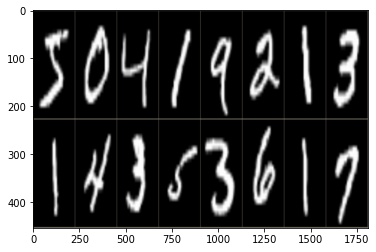

In [13]:
imshow(feature_grid)

In [14]:
# load saved transformed dataset
alexnet_features = torch.load("/Users/abhinavpandey/Projects/Math6380o/train_alexnetmod_dataset.pt")

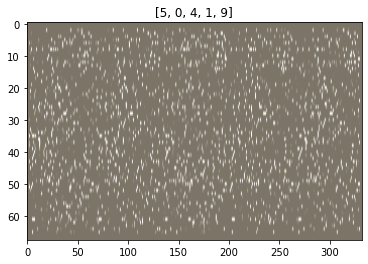

In [15]:
minibatch_size = 5
dataloader_new = DataLoader(alexnet_features, batch_size=minibatch_size)

batch_id, [features, labels] = next(enumerate(dataloader_new))



feat_reshaped = features.reshape(minibatch_size, 1, 1, 4096)

feat_reshaped = feat_reshaped.reshape(minibatch_size, 1, 64, 64)

img_grid = make_grid(feat_reshaped)

img_grid.shape

imshow(img_grid, title=[x.item() for x in labels])

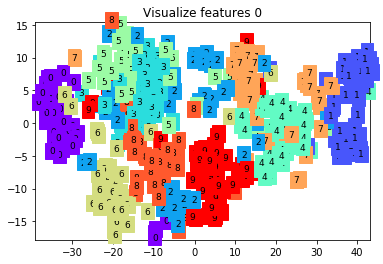

In [16]:
dataloader_tsne = DataLoader(alexnet_features, batch_size=500)
visualize_tsne(dataloader_tsne)

In [2]:
extract_mnist_features(ignore=["vgg16", "resnet"], save_to_disk=False)

Batch 0, features shape: torch.Size([1000, 3, 224, 224]), labels shape: torch.Size([1000])
Output shape: torch.Size([1000, 4096]), Time taken: 37.47291803359985
Batch 1, features shape: torch.Size([1000, 3, 224, 224]), labels shape: torch.Size([1000])
Output shape: torch.Size([1000, 4096]), Time taken: 33.34507703781128
Batch 2, features shape: torch.Size([1000, 3, 224, 224]), labels shape: torch.Size([1000])
Output shape: torch.Size([1000, 4096]), Time taken: 32.22485089302063
Batch 3, features shape: torch.Size([1000, 3, 224, 224]), labels shape: torch.Size([1000])
Output shape: torch.Size([1000, 4096]), Time taken: 33.20851993560791
Batch 4, features shape: torch.Size([1000, 3, 224, 224]), labels shape: torch.Size([1000])


KeyboardInterrupt: 

In [3]:
from Dataset import TransformedMNIST
TransformedMNIST()

100.1%

Extracting /Users/abhinavpandey/PycharmProjects/math6380o/project1/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /Users/abhinavpandey/PycharmProjects/math6380o/project1/mnist/MNIST/raw


113.5%

Extracting /Users/abhinavpandey/PycharmProjects/math6380o/project1/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /Users/abhinavpandey/PycharmProjects/math6380o/project1/mnist/MNIST/raw


100.4%

Extracting /Users/abhinavpandey/PycharmProjects/math6380o/project1/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /Users/abhinavpandey/PycharmProjects/math6380o/project1/mnist/MNIST/raw


180.4%

Extracting /Users/abhinavpandey/PycharmProjects/math6380o/project1/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/abhinavpandey/PycharmProjects/math6380o/project1/mnist/MNIST/raw
Processing...
Done!


In [7]:
import kymatio

In [8]:
mnist = TransformedMNIST()

In [9]:
dataset = mnist.get_train()

In [10]:
dataloader = DataLoader(dataset, batch_size=16)

In [11]:
batch_id, (features, labels) = next(enumerate(dataloader))

In [13]:
features.shape

torch.Size([16, 3, 224, 224])

In [14]:
grid = make_grid(features)

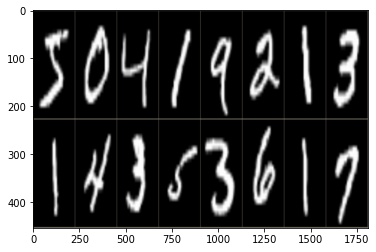

In [18]:
imshow(grid)

In [4]:
from kymatio import Scattering2D

In [5]:
scattering = Scattering2D(J=2, shape=(224, 224))

In [24]:
t1 = time()
scat_feat = scattering(features)
t2 = time()
print(t2-t1)

37.78010678291321


In [2]:
scattering_transform_mnist(save_to_disk=True, train=True)

Running scattering transform
Batch 0, features shape: torch.Size([10, 1, 28, 28]), labels shape: torch.Size([10])
Output shape: torch.Size([10, 1, 81, 7, 7]), Time taken: 0.4032468795776367
Flattend output shape: torch.Size([10, 1, 3969])
Batch 1, features shape: torch.Size([10, 1, 28, 28]), labels shape: torch.Size([10])
Output shape: torch.Size([10, 1, 81, 7, 7]), Time taken: 0.5434889793395996
Flattend output shape: torch.Size([10, 1, 3969])
Batch 2, features shape: torch.Size([10, 1, 28, 28]), labels shape: torch.Size([10])
Output shape: torch.Size([10, 1, 81, 7, 7]), Time taken: 0.5021052360534668
Flattend output shape: torch.Size([10, 1, 3969])
Batch 3, features shape: torch.Size([10, 1, 28, 28]), labels shape: torch.Size([10])
Output shape: torch.Size([10, 1, 81, 7, 7]), Time taken: 0.4835786819458008
Flattend output shape: torch.Size([10, 1, 3969])
Batch 4, features shape: torch.Size([10, 1, 28, 28]), labels shape: torch.Size([10])
Output shape: torch.Size([10, 1, 81, 7, 7]), T

KeyboardInterrupt: 

In [3]:
t = torch.rand(1000, 1, 81, 7, 7)

In [8]:
t_new = torch.flatten(t, start_dim=2, end_dim=-1)

In [9]:
t_new.shape

torch.Size([1000, 1, 3969])